In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = 'vscode'

In [2]:
import pandas as pd
list_data = ['uber-raw-data-aug14.csv','uber-raw-data-jul14.csv','uber-raw-data-jun14.csv','uber-raw-data-may14.csv','uber-raw-data-sep14.csv']
df = pd.read_csv('uber-raw-data-apr14.csv')
for data in list_data: #to create a dataframe with others
    df_temp = pd.read_csv(data) 
    df = pd.concat([df,df_temp],axis=0)
df

Date/Time      Lat      Lon    Base
0          4/1/2014 0:11:00  40.7690 -73.9549  B02512
1          4/1/2014 0:17:00  40.7267 -74.0345  B02512
2          4/1/2014 0:21:00  40.7316 -73.9873  B02512
3          4/1/2014 0:28:00  40.7588 -73.9776  B02512
4          4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                     ...      ...      ...     ...
1028131  9/30/2014 22:57:00  40.7668 -73.9845  B02764
1028132  9/30/2014 22:57:00  40.6911 -74.1773  B02764
1028133  9/30/2014 22:58:00  40.8519 -73.9319  B02764
1028134  9/30/2014 22:58:00  40.7081 -74.0066  B02764
1028135  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[4534327 rows x 4 columns]

In [3]:
df['Entire_date']=pd.to_datetime(df['Date/Time'])#convertion str date --> datetime
df['day'] = df['Entire_date'].dt.strftime('%A')
df.drop(['Date/Time','Base'],axis=1,inplace=True)
df = df[df['Entire_date'].dt.hour ==9]#Selected only rows at 9am
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159967 entries, 212 to 1022473
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Lat          159967 non-null  float64       
 1   Lon          159967 non-null  float64       
 2   Entire_date  159967 non-null  datetime64[ns]
 3   day          159967 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.1+ MB


In [4]:
df

Lat      Lon         Entire_date      day
212      40.7841 -73.9542 2014-04-01 09:00:00  Tuesday
213      40.7426 -73.9963 2014-04-01 09:02:00  Tuesday
214      40.7710 -73.8669 2014-04-01 09:05:00  Tuesday
215      40.7750 -73.9888 2014-04-01 09:06:00  Tuesday
216      40.7356 -74.0029 2014-04-01 09:07:00  Tuesday
...          ...      ...                 ...      ...
1022469  40.7444 -74.0022 2014-09-30 09:58:00  Tuesday
1022470  40.7679 -73.9622 2014-09-30 09:59:00  Tuesday
1022471  40.7409 -73.9936 2014-09-30 09:59:00  Tuesday
1022472  40.8556 -73.9124 2014-09-30 09:59:00  Tuesday
1022473  40.7409 -73.9936 2014-09-30 09:59:00  Tuesday

[159967 rows x 4 columns]

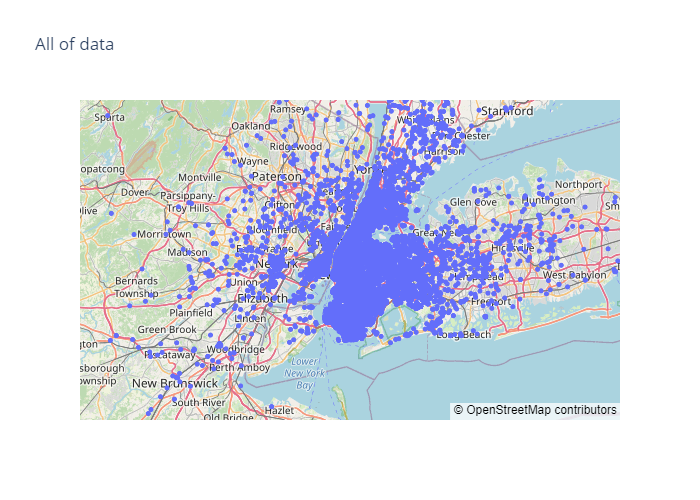

In [6]:
fig = px.scatter_mapbox(lat=df['Lat'],lon=df['Lon'],mapbox_style = 'open-street-map',title='All of data')
# fig.show(renderer='notebook')
fig.show('png')

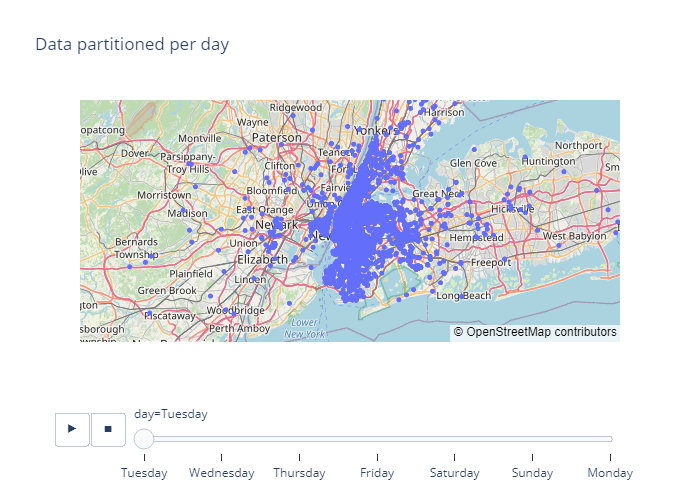

In [7]:
fig = px.scatter_mapbox(data_frame=df,lat=df['Lat'],lon=df['Lon'],mapbox_style = 'open-street-map',animation_frame='day',title='Data partitioned per day')
# fig.show(renderer='notebook')
fig.show('png')

In [8]:
X = df[['Lat','Lon']]
X = X.values

DBSCAN CLUSTERING

In [9]:
df_scan = df.copy()

scanner = DBSCAN(eps=0.01,min_samples=100,metric='euclidean')
scanner.fit(X)
df_scan['cluster'] = scanner.labels_
fig = px.scatter_mapbox(data_frame=df_scan,lat=df_scan['Lat'],lon=df_scan['Lon'],color='cluster',mapbox_style = 'open-street-map',animation_frame='day',title='Dbscan clustering')
# fig.show(renderer='notebook')


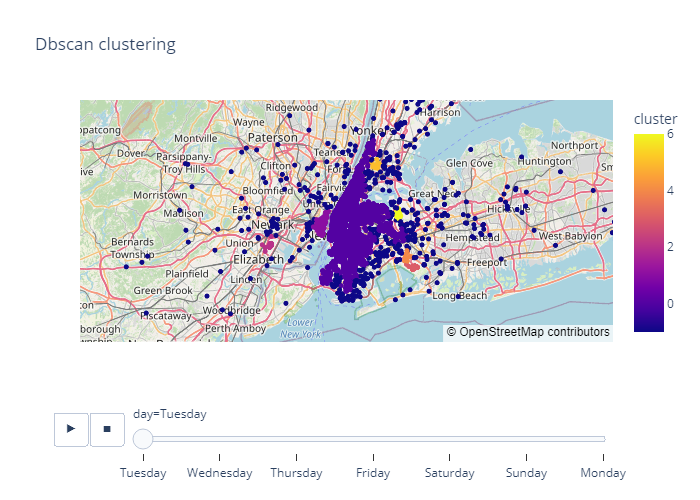

In [11]:
fig.show('png')

KMEANS CLUSTERING

In [12]:
df_kmeans= df


Elbow method for intra-cluster distance 

WCSS for K=1 --> 729.3768980480096
WCSS for K=2 --> 480.13174698195223
WCSS for K=3 --> 363.57040838517116
WCSS for K=4 --> 305.0995291358007
WCSS for K=5 --> 254.2040127206764
WCSS for K=6 --> 198.96605898184265
WCSS for K=7 --> 166.811140454103
WCSS for K=8 --> 140.54552163406515
WCSS for K=9 --> 124.50883976209892
WCSS for K=10 --> 110.29905393615384


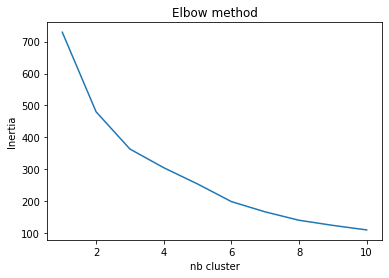

In [15]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))
plt.title('Elbow method')
plt.xlabel('nb cluster')
plt.ylabel('Inertia')
plt.plot(k,wcss)
plt.show()

Silhouette method for inter-cluster distance

 12%|█▎        | 1/8 [07:26<52:04, 446.40s/it]

Silhouette score for K=2 is 0.660105672991046


 25%|██▌       | 2/8 [14:05<41:51, 418.59s/it]

Silhouette score for K=3 is 0.38564055293162014


 38%|███▊      | 3/8 [20:57<34:36, 415.39s/it]

Silhouette score for K=4 is 0.39530298540037295


 50%|█████     | 4/8 [26:44<25:53, 388.46s/it]

Silhouette score for K=5 is 0.4241276060488665


 62%|██████▎   | 5/8 [41:54<28:49, 576.64s/it]

Silhouette score for K=6 is 0.43631036231052445


 75%|███████▌  | 6/8 [48:16<17:01, 510.53s/it]

Silhouette score for K=7 is 0.44143917050912546


 88%|████████▊ | 7/8 [55:00<07:55, 475.49s/it]

Silhouette score for K=8 is 0.4487671898612099


100%|██████████| 8/8 [1:01:15<00:00, 459.45s/it]

Silhouette score for K=9 is 0.3914692484888121


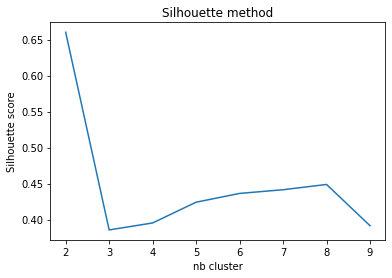

In [16]:
X_silh = df_kmeans[['Lon','Lat']].sample(frac=0.30)
sil = []
k = []
from tqdm import tqdm
## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels
for i in tqdm(range (2,10)):
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

plt.title('Silhouette method')
plt.xlabel('nb cluster')
plt.ylabel('Silhouette score')
plt.plot(k,sil)
plt.show()

C:\Users\elvis\AppData\Local\Temp/ipykernel_7800/2730789793.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



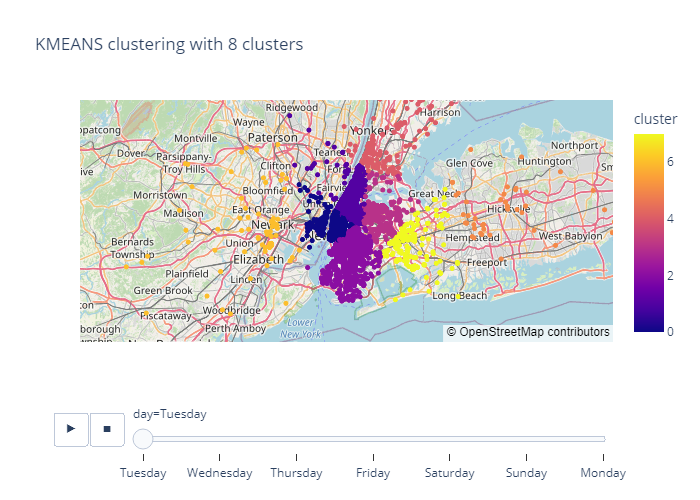

In [17]:
kmeans = KMeans(n_clusters= 8, init = "k-means++", random_state = 0)
kmeans.fit(X)
df_kmeans['cluster'] = kmeans.labels_
fig = px.scatter_mapbox(data_frame=df_kmeans,lat=df_kmeans['Lat'],lon=df_kmeans['Lon'],color='cluster',mapbox_style = 'open-street-map',animation_frame='day',title='KMEANS clustering with 8 clusters')
# fig.show(renderer='notebook')
fig.show('png')

C:\Users\elvis\AppData\Local\Temp/ipykernel_7800/4204860345.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



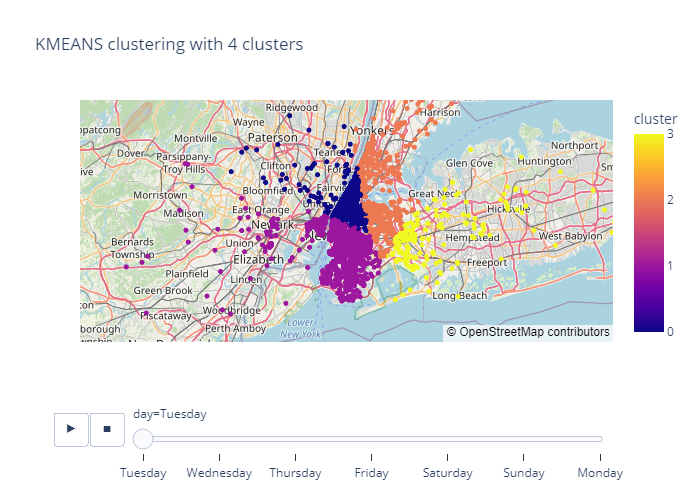

In [18]:
kmeans = KMeans(n_clusters= 4, init = "k-means++", random_state = 0)
kmeans.fit(X)
df_kmeans['cluster'] = kmeans.labels_
fig = px.scatter_mapbox(data_frame=df_kmeans,lat=df_kmeans['Lat'],lon=df_kmeans['Lon'],color='cluster',mapbox_style = 'open-street-map',animation_frame='day',title='KMEANS clustering with 4 clusters')
# fig.show(renderer='notebook')
fig.show('png')

Demontration of Uber activity in April 2014 by hour

In [19]:
df_all_hours = pd.read_csv('uber-raw-data-apr14.csv').drop('Base',axis=1)
df_all_hours['Entire_date']=pd.to_datetime(df_all_hours['Date/Time'])
df_all_hours['hours'] = df_all_hours['Entire_date'].dt.hour
df_all_hours.drop('Date/Time',axis=1,inplace=True)
df_all_hours

Lat      Lon         Entire_date  hours
0       40.7690 -73.9549 2014-04-01 00:11:00      0
1       40.7267 -74.0345 2014-04-01 00:17:00      0
2       40.7316 -73.9873 2014-04-01 00:21:00      0
3       40.7588 -73.9776 2014-04-01 00:28:00      0
4       40.7594 -73.9722 2014-04-01 00:33:00      0
...         ...      ...                 ...    ...
564511  40.7640 -73.9744 2014-04-30 23:22:00     23
564512  40.7629 -73.9672 2014-04-30 23:26:00     23
564513  40.7443 -73.9889 2014-04-30 23:31:00     23
564514  40.6756 -73.9405 2014-04-30 23:32:00     23
564515  40.6880 -73.9608 2014-04-30 23:48:00     23

[564516 rows x 4 columns]

In [20]:
X_all_hours = df_all_hours[['Lat','Lon']]
X_all_hours = X_all_hours.values


Elbow method

WCSS for K=1 --> 2170.4257366615
WCSS for K=2 --> 1355.9512563425003
WCSS for K=3 --> 1020.4984770083095
WCSS for K=4 --> 809.5611266121966
WCSS for K=5 --> 627.744830827846
WCSS for K=6 --> 494.81022769180544
WCSS for K=7 --> 409.00310175940854
WCSS for K=8 --> 361.07836107485105
WCSS for K=9 --> 325.3374143982797
WCSS for K=10 --> 292.459033086287


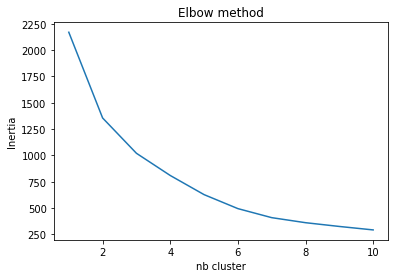

In [21]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X_all_hours)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))
plt.title('Elbow method')
plt.xlabel('nb cluster')
plt.ylabel('Inertia')
plt.plot(k,wcss)
plt.show()

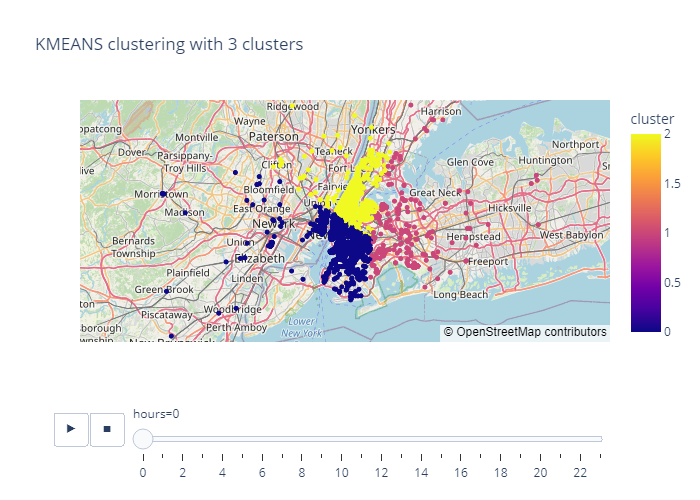

In [22]:
kmeans = KMeans(n_clusters= 3, init = "k-means++", random_state = 0)
kmeans.fit(X_all_hours)
df_all_hours['cluster'] = kmeans.labels_
fig = px.scatter_mapbox(data_frame=df_all_hours,lat=df_all_hours['Lat'],lon=df_all_hours['Lon'],color='cluster',mapbox_style = 'open-street-map',animation_frame='hours',title='KMEANS clustering with 3 clusters')
# fig.show(renderer='notebook')
fig.show('png')